In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Section 1 - Load and Visualise Data
 - Download 
 - Load
 - Visualise
 - Normalisation

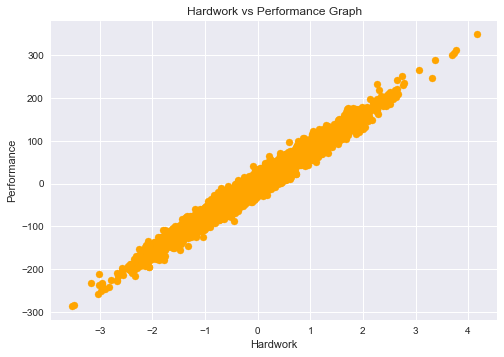

In [28]:
X = pd.read_csv("Hardwork_Training Data/Linear_X_Train.csv")
Y = pd.read_csv("Hardwork_Training Data/Linear_Y_Train.csv")

#Convert X, Y to NUmpy array
X = X.values
y = Y.values

#Normalisation
u = X.mean()
std = X.std()
X = (X-u)/std

#Visualise
plt.style.use('seaborn')
plt.scatter(X, y, color='orange')
plt.title("Hardwork vs Performance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

In [29]:
X

array([[-0.25352061],
       [-0.55541377],
       [ 1.07380656],
       ...,
       [-0.26950343],
       [ 1.72730762],
       [-0.4575866 ]])

### Section 2  - Linear Regression

In [30]:
def hypothesis(x, theta):
    # theta = [theta0 , theta1]
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2, ))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x, theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
        
    return grad/m

def error(X, Y, theta):
    m = X.shape[0]
    total_error = 0.0
    
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        total_error += (y_ - Y[i])**2
    
    return (total_error/m)

def gradientDescent(X, Y, max_steps=100, learning_rate=0.1):
    
    theta = np.zeros((2, ))
    error_list = []
    theta_list = []
    
    for i in range(max_steps):
        
        #Compute grad
        grad = gradient(X, Y, theta)
        e = error(X, Y, theta)[0]
        
        
        #Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        #Storing the theta values during update
        theta_list.append((theta[0], theta[1]))
        error_list.append(e)
        
    return theta, error_list,theta_list

In [31]:
theta,error_list,theta_list = gradientDescent(X, y)

In [32]:
theta

array([ 0.6838508 , 79.90361453])

In [33]:
theta_list

[(0.06838689680155924, 7.990573694249979),
 (0.12993510392296198, 15.182090019074964),
 (0.18532849033222443, 21.654454711417454),
 (0.23518253810056078, 27.479582934525695),
 (0.2800511810920641, 32.72219833532309),
 (0.3204329597844162, 37.44055219604077),
 (0.35677656060753327, 41.68707067068668),
 (0.3894858013483388, 45.508937297867995),
 (0.41892411801506385, 48.94861726233117),
 (0.4454186030151161, 52.044329230348026),
 (0.46926363951516337, 54.83047000156319),
 (0.490724172365206, 57.337996695656855),
 (0.5100386519302443, 59.594770720341145),
 (0.5274216835387786, 61.62586734255701),
 (0.5430664119864597, 63.45385430255129),
 (0.5571466675893725, 65.09904256654615),
 (0.569818897631994, 66.57971200414151),
 (0.5812239046703536, 67.91231449797735),
 (0.591488411004877, 69.11165674242959),
 (0.6007264667059482, 70.19106476243661),
 (0.6090407168369123, 71.16253198044294),
 (0.6165235419547797, 72.03685247664862),
 (0.6232580845608605, 72.82374092323374),
 (0.6293191729063334, 7

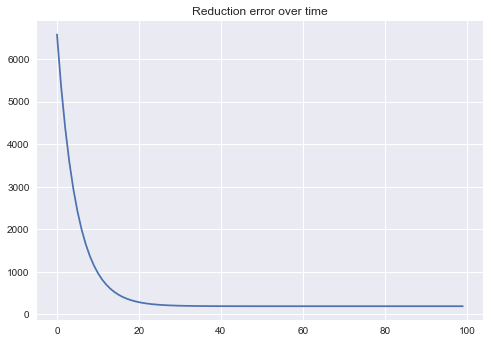

In [34]:
plt.plot(error_list)
plt.title("Reduction error over time")
plt.show()

## Section 3 - Prediction and best line

In [35]:
y_ = hypothesis(X, theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


<function matplotlib.pyplot.show(*args, **kw)>

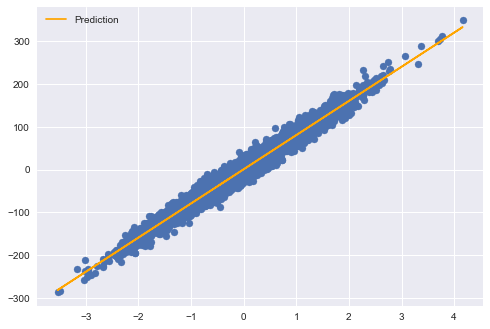

In [36]:
plt.scatter(X, y)
plt.plot(X, y_, color="orange", label='Prediction')
plt.legend()
plt.show

In [37]:
# Load the test data
X_test = pd.read_csv('Hardwork_Test Cases/Linear_X_Test.csv').values
y_test = hypothesis(X_test,theta)

In [38]:
df = pd.DataFrame(data=y_test, columns=["y"])

In [39]:
df.to_csv('Hardwork_result.csv', index=False)

## Section 4 - Computing Score
Score : R2(R-squared) or Coefficent of Determination

In [40]:
def r2_score(Y, y_):
    num = np.sum((Y- y_)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1 - num/denom)
    return score*100

In [41]:
r2_score(y, y_)

97.09612226971643

## Section - 5 Visualising Loss Function, Gradient Descent Trajectory, Theta Updates

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [43]:
X

array([[-0.25352061],
       [-0.55541377],
       [ 1.07380656],
       ...,
       [-0.26950343],
       [ 1.72730762],
       [-0.4575866 ]])

In [44]:
#Loss Actually
T0 = np.arange(-40,40, 1)
T1 = np.arange(40,120,1)

T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i, j]*X + T0[i, j]
        J[i, j] = np.sum((y-y_)**2)/y.shape[0]

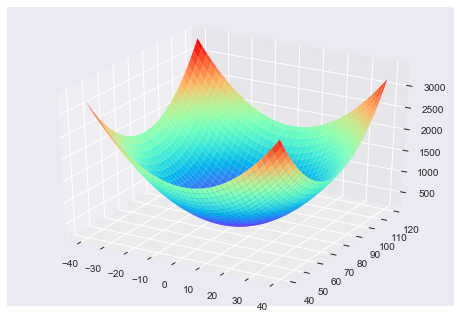

In [45]:
#Visualise the J on loss
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0, T1, J, cmap = 'rainbow')
plt.show()

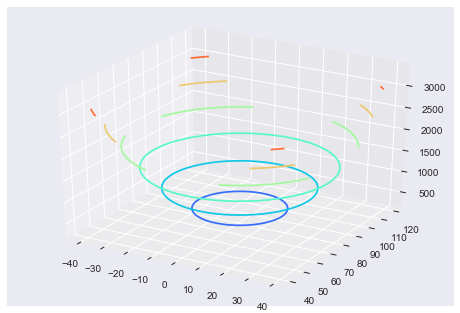

In [46]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0, T1, J, cmap = 'rainbow')
plt.show()

### Plot the changes in the values of theta

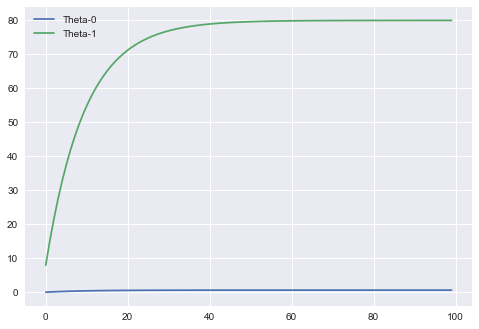

In [47]:
theta_list = np.array(theta_list)
plt.plot(theta_list[:,0], label='Theta-0')
plt.plot(theta_list[:,1], label='Theta-1')
plt.legend()
plt.show()

### Trajectory traced by theta updates in the loss function

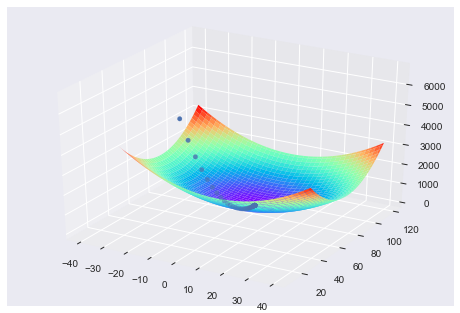

In [48]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1, J,cmap='rainbow')
axes.scatter(theta_list[:,0], theta_list[:,1],error_list)
plt.show()

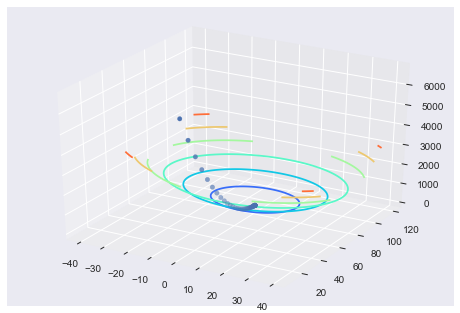

In [49]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1, J,cmap='rainbow')
axes.scatter(theta_list[:,0], theta_list[:,1],error_list)
plt.show()

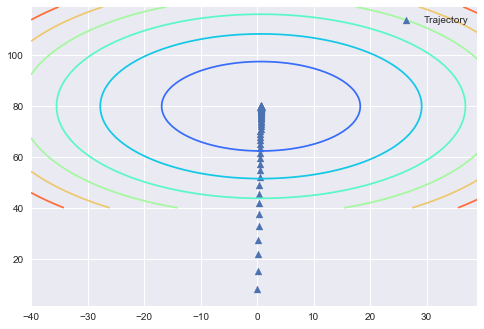

In [50]:
#contour 2D plot
plt.contour(T0,T1, J,cmap='rainbow')
plt.scatter(theta_list[:,0], theta_list[:,1],marker='^', label="Trajectory")
plt.legend()
plt.show()

In [51]:
# Saving the data in the file

theta_list
np.save("Theta_list.npy", theta_list)